# Final Processing XID+MIPS ELAIS-S1
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+MIPS_ELAIS-S1_20180212.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J003311.854-452559.212,8.2993897334,-45.4331144811,70.8551,100.277,43.0187,-0.00853529,4.94265e-06,0.998633,1508.0,0.0
HELP_J003311.199-452603.296,8.2966614384,-45.4342490173,136.227,164.495,106.93,-0.00853529,4.94265e-06,1.00005,2000.0,0.0
HELP_J003315.424-452615.143,8.31426712989,-45.4375397927,93.2529,124.365,62.9979,-0.00853529,4.94265e-06,nan,1138.0,0.0
HELP_J003315.452-452606.430,8.31438135339,-45.4351194503,9.39005,23.3159,2.61225,-0.00853529,4.94265e-06,nan,2000.0,0.0
HELP_J003314.599-452546.572,8.31082943334,-45.4296033101,152.254,179.911,125.606,-0.00853529,4.94265e-06,nan,2000.0,0.0
HELP_J003306.225-452506.589,8.27593562562,-45.4184968362,372.777,395.828,348.451,-0.00271362,5.25661e-06,nan,2000.0,0.0
HELP_J003302.815-452550.432,8.26173107575,-45.4306756516,12.826,28.9045,3.70633,-0.00271362,5.25661e-06,nan,2000.0,0.0
HELP_J003304.883-452634.388,8.27034568672,-45.4428854649,430.479,459.679,402.075,-0.00271362,5.25661e-06,nan,2000.0,0.0


In [4]:
from astropy import units as u

In [5]:
u.degree

Unit("deg")

In [6]:
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree
cat['F_MIPS_24'].unit=u.uJy
cat['FErr_MIPS_24_l'].unit=u.uJy
cat['FErr_MIPS_24_u'].unit=u.uJy

## Look at Symmetry of PDFs to determine depth level of catalogue

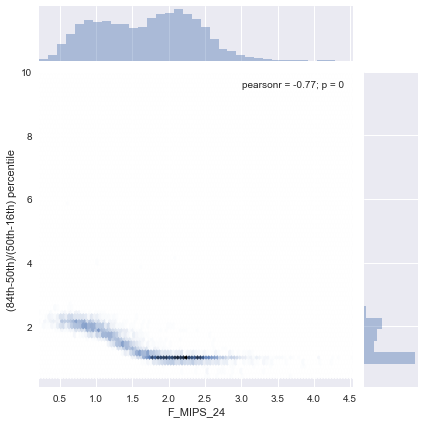

In [12]:
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
#g=sns.jointplot(x=np.log10(cat['F_MIPS_24']),y=skew,ylim=(0.1,10))
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][0:5000]),y=skew[0:5000],ylim=(0.1,10), kind='hex')


Both seem to have flux pdfs that become Gaussian at ~30$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [15]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [16]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 30.0)


In [17]:
cat['flag_mips_24'][ind]=True


In [18]:
cat.write('./data/dmu26_XID+MIPS_ELAIS-S1_20180215.fits', format='fits',overwrite=True)
